In [1]:
import sys
sys.path.append('..')

In [2]:
from pathlib import Path
import os

# 获取当前工作目录
HERE = Path(os.getcwd())
DATA = HERE / 'data'
if not DATA.exists():
    DATA.mkdir(parents=True, exist_ok=True)
print(DATA)

/Users/wangyang/Desktop/AI-drug-design/list/02_Basics of drug design/L1-machine-learning-in-chemistry/data


# Nice to meet you !!   

---

本次有一个激动人心的挑战：* *AIDD* *。准备深入探究化学数据库和驱动化学信息学的多样化数据格式的迷人世界。
为掌握旨在分析分子的革命性机器学习技术而奋斗，并为潜在的药物突破产生新的想法。当你踏上这段旅程时，把自己想象成一个跨学科团队中的指导力量，推动彼此走向令人瞩目的发现。成功等待着那些敢于推进边界的人。祝你的探险之旅一切顺利!

# Python 🐍

----

## Environment Setup

在这些课程中，我们将使用**Python**。有关如何安装所有所需软件包的说明可以在此存储库主页上的README文件中找到。我们将使用**Jupyter**笔记本作为编码环境。要运行笔记本，您需要：

1.激活创建的conda环境：`conda激活`

2.使用命令运行Jupyter服务器：`jupyter notebook`

3.笔记本应该在您的浏览器中自动启动。如果这种情况没有发生，您应该在浏览器中输入“localhost:8888”（8888是默认端口，但您可以在笔记本运行时在控制台输出中检查确切的端口）

在计算机上运行笔记本的替代方案是使用[**Colab**](https://colab.research.google.com/)。在这种情况下，所有结果都会保存到您的谷歌云端硬盘中。一个明显的缺点是，许多与化学相关的软件包将难以在Colab中安装。

## 对于初学者

推荐的Python课程：

- JU course: ["Python for data processing"](https://github.com/gmum/python-for-data-processing)
- JU course: ["Effective Python"](https://github.com/kmisztal/effective_python)
- MIT course: ["Introduction to Computer Science and Programming in Python"](https://ocw.mit.edu/courses/6-0001-introduction-to-computer-science-and-programming-in-python-fall-2016/)
- Coursera: ["Python Basics"](https://www.coursera.org/learn/python-basics) 
- Coursera: ["Crash Course on Python"](https://www.coursera.org/learn/python-crash-course)
- Interactive course: ["100 Days of Code"](https://replit.com/learn/100-days-of-python)

# 简言之，机器学习

---

机器学习是**人工智能**的一个分支。机器学习方法正在从可用数据中学习，以给出更准确的预测。在本课程中，我们将主要使用**监督学习**，其中所有数据都有一个标签。例如，在毒性预测中，模型将使用化合物表示及其二元毒性标签（有毒或无毒）进行训练。如果标签是离散的，即它们是类或类别，我们谈论的是**分类方法**。如果标签是连续的（例如，化合物的溶解度可以以每升溶剂的克表示），我们谈论的是**回归方法**。

当标签未知时，我们还将触及**无监督学习**的话题，因此我们将尝试在不知道任何类的基本真理分配的情况下发现数据中的关系。化学中无监督学习最典型的例子是**生成建模**。这种模型以一组分子为输入，并试图生成与提供的分子相似的新分子。因此，该模型学习了训练集的特征和化合物之间的相似性。另一个无监督方法的例子是**聚类**，它旨在提取相似对象的组。

最后，还有另一类方法不需要任何输入数据，而是通过与（虚拟）环境交互自行创建新数据。这些算法被称为**强化学习**。在药物设计中，这些方法特别有用，因为我们想优化生成的候选药物的化学性质。

## Machine Learning Materials

The recommended ML courses:

- JU course: ["Neural Networks"](https://github.com/gmum/nn2019)
- JU course: ["Machine Learning"](https://github.com/gmum/ml2017)
- Coursera: ["Machine Learning"](https://www.coursera.org/learn/machine-learning)
- Coursera: ["Deep Learning"](https://www.coursera.org/specializations/deep-learning)

## Example Code for Training Linear Regression

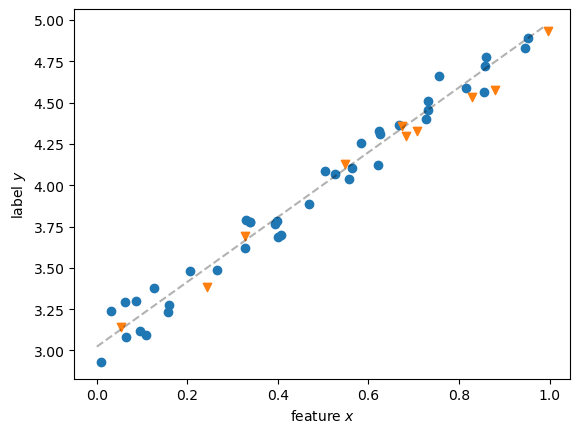

In [3]:
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
import numpy as np


# generate random data
x = np.random.uniform(0., 1., size=50)
y = 2 * x + 3 + np.random.normal(scale=0.1, size=50)

# split the data into the training and testing sets
x_train = x[:40]
y_train = y[:40]

x_test = x[40:]
y_test = y[40:]

# create a linear regression model and train it using the training data
reg = LinearRegression()
reg.fit(x_train.reshape(-1, 1), y_train)

# construct the line corresponding to the trained linear model
x_range = np.arange(0., 1., 0.01)
y_pred = reg.predict(x_range.reshape(-1, 1))

# plot everything
plt.plot(x_range, y_pred, c='k', ls='--', alpha=0.3)
plt.scatter(x_train, y_train)
plt.scatter(x_test, y_test, marker='v')
plt.xlabel('feature $x$')
plt.ylabel('label $y$')
plt.show()

# Molecular Represenations

---

化学物质对于计算机来说不容易理解。它们是高度结构化和多维的，因此将它们编码在计算机驱动器的位上是一个挑战。分子的数值表示有很多种，每一种都是为不同的目的量身定做的。下面描述两种最标准的分子表示。第一种最常用于在计算机上存储化合物数据集。第二种方法可以被经典的机器学习模型用来学习属性预测任务。

## SMILES

简化分子线性输入规范( SMILES )是一个化合物的文本表示。由于以下两个原因，它是数据库中存储分子的最基本的表示：
- 1 .文本可以方便地保存在CSV文件中，
# Molecular Represenations

---

化学物质对于计算机来说不容易理解。它们是高度结构化和多维的，因此将它们编码在计算机驱动器的位上是一个挑战。分子的数值表示有很多种，每一种都是为不同的目的量身定做的。下面描述两种最标准的分子表示。第一种最常用于在计算机上存储化合物数据集。第二种方法可以被经典的机器学习模型用来学习属性预测任务。

## SMILES

简化分子线性输入规范( SMILES )是一个化合物的文本表示。由于以下两个原因，它是数据库中存储分子的最基本的表示：
- 1 .文本可以方便地保存在CSV文件中，
2 .这个表示可以用来确定地识别一个化合物(并且在一定程度上也是其空间安排)。
当然，这种表述也存在一些弊端。一个是反变换可以是模糊的，因为一个化合物可以用多个不同的SIMLES字符串来表示。同时，线性表示也不能很好地捕捉化学结构的复杂性。

### Simplified Procedure of SMILES Construction

![smiles](https://upload.wikimedia.org/wikipedia/commons/0/00/SMILES.png)

1 .制备化合物的结构式；
2 .剪掉所有的环，创建一个原子的连接树；
3 .选择任意一个起始原子，在化合物的整个过程中写下所有的键和原子( DFS顺序)；
4 .替代路径应在括号中标明分支；
5 .环切口附近的原子应该用匹配指数(对索引冲突进行警戒)来标记。
上述算法可以扩展为包含排序规则，例如"在结构式中找到最长路径并将其作为主路径"，使得SMILES表示具有确定性(故称* *典范SMILES * *)。
在SMILES中，还可以对化合物的空间几何结构进行编码。下面列出的SMILES字符串可以是拷贝-粘贴到下面的输入，以便在3D中看到这些化合物。令

#### Popular drugs 

1. Ibuprofen: `CC(C)CC1=CC=C(C=C1)C(C)C(=O)O` lub `CC(C)Cc1ccc(cc1)C(C)C(=O)O`
2. Penicillin: `CC1(C(N2C(S1)C(C2=O)NC(=O)CC3=CC=CC=C3)C(=O)O)C` lub `CC1(C(N2C(S1)C(C2=O)NC(=O)CC1=CC=CC=C1)C(=O)O)C`
3. Fluoxetine: `CNCCC(C1=CC=CC=C1)OC2=CC=C(C=C2)C(F)(F)F`
4. THC: `CCCCCC1=CC2=C(C3C=C(CCC3C(O2)(C)C)C)C(=C1)O`

#### SMILES and the spatial arrangement of atoms

在设计药物时，药物的空间排布是非常重要的。有时两个具有相同结构式(不考虑几何形状)的化合物具有完全不同的生物学效应。沙利度胺是一个臭名昭著的例子，被设计为止痛药和止吐药，但其镜像形式却被证明是致畸的。

(R)-talidomid: `C1CC(=O)NC(=O)[C@@H]1N2C(=O)C3=CC=CC=C3C2=O`

(S)-talidomid: `C1CC(=O)NC(=O)[C@H]1N2C(=O)C3=CC=CC=C3C2=O`

#### Similariy of the compounds having similar effects

诱导类似效应的化合物往往也具有类似的结构式和原子的空间排列方式。许多药物是通过对已知具有某些治疗作用的物质进行修饰而开发出来的，使其具有更强的药效。以下三种物质为阿片类物质，其中前两种为天然的(从罂粟中提取)，第三种为人工合成的麻醉剂。
你看到这些分子之间有什么不同?

morphine: `CN1CC[C@]23[C@@H]4[C@H]1CC5=C2C(=C(C=C5)O)O[C@H]3[C@H](C=C4)O`

codeine: `COC1=C(O2)C3=C(C=C1)C[C@@H]4[C@]5([H])C=C[C@H](O)[C@H]2[C@@]53CCN4C`

heroine: `CC(=O)OC1C=CC2C3CC4=C5C2(C1OC5=C(C=C4)OC(=O)C)CCN3C`2 .这个表示可以用来确定地识别一个化合物(并且在一定程度上也是其空间安排)。
当然，这种表述也存在一些弊端。一个是反变换可以是模糊的，因为一个化合物可以用多个不同的SIMLES字符串来表示。同时，线性表示也不能很好地捕捉化学结构的复杂性。

### Simplified Procedure of SMILES Construction

![smiles](https://upload.wikimedia.org/wikipedia/commons/0/00/SMILES.png)

1 .制备化合物的结构式；
2 .剪掉所有的环，创建一个原子的连接树；
3 .选择任意一个起始原子，在化合物的整个过程中写下所有的键和原子( DFS顺序)；
4 .替代路径应在括号中标明分支；
5 .环切口附近的原子应该用匹配指数(对索引冲突进行警戒)来标记。
上述算法可以扩展为包含排序规则，例如"在结构式中找到最长路径并将其作为主路径"，使得SMILES表示具有确定性(故称* *典范SMILES * *)。
在SMILES中，还可以对化合物的空间几何结构进行编码。下面列出的SMILES字符串可以是拷贝-粘贴到下面的输入，以便在3D中看到这些化合物。令

#### Popular drugs 

1. Ibuprofen: `CC(C)CC1=CC=C(C=C1)C(C)C(=O)O` lub `CC(C)Cc1ccc(cc1)C(C)C(=O)O`
2. Penicillin: `CC1(C(N2C(S1)C(C2=O)NC(=O)CC3=CC=CC=C3)C(=O)O)C` lub `CC1(C(N2C(S1)C(C2=O)NC(=O)CC1=CC=CC=C1)C(=O)O)C`
3. Fluoxetine: `CNCCC(C1=CC=CC=C1)OC2=CC=C(C=C2)C(F)(F)F`
4. THC: `CCCCCC1=CC2=C(C3C=C(CCC3C(O2)(C)C)C)C(=C1)O`

#### SMILES and the spatial arrangement of atoms

在设计药物时，药物的空间排布是非常重要的。有时两个具有相同结构式(不考虑几何形状)的化合物具有完全不同的生物学效应。沙利度胺是一个臭名昭著的例子，被设计为止痛药和止吐药，但其镜像形式却被证明是致畸的。

(R)-talidomid: `C1CC(=O)NC(=O)[C@@H]1N2C(=O)C3=CC=CC=C3C2=O`

(S)-talidomid: `C1CC(=O)NC(=O)[C@H]1N2C(=O)C3=CC=CC=C3C2=O`

#### Similariy of the compounds having similar effects

诱导类似效应的化合物往往也具有类似的结构式和原子的空间排列方式。许多药物是通过对已知具有某些治疗作用的物质进行修饰而开发出来的，使其具有更强的药效。以下三种物质为阿片类物质，其中前两种为天然的(从罂粟中提取)，第三种为人工合成的麻醉剂。
你看到这些分子之间有什么不同?

morphine: `CN1CC[C@]23[C@@H]4[C@H]1CC5=C2C(=C(C=C5)O)O[C@H]3[C@H](C=C4)O`

codeine: `COC1=C(O2)C3=C(C=C1)C[C@@H]4[C@]5([H])C=C[C@H](O)[C@H]2[C@@]53CCN4C`

heroine: `CC(=O)OC1C=CC2C3CC4=C5C2(C1OC5=C(C=C4)OC(=O)C)CCN3C`

---

<div style="display: flex; justify-content: space-between">
    <div style="width: 20%; display: inline-block; margin: 20px">
        <img src="../assets/profile1.png" width="100%">
    </div>
    <div style="width: 60%; display: inline-block; margin: 20px">
        <p><strong>Nitro:</strong> 你在那儿!让我们来谈谈分子构象，以及为什么它们在药物设计中是超级重要的!

将分子想象成微小的、3D的谜题。现在，每个分子都可以以不同的方式进行扭转和翻转，就像你可以如何排列各种构型的拼图片一样。这些不同的排列方式称为*构象*。
现在，为什么我们在药物设计中会关心这些构象?那么，这里的处理是这样的：一个分子的形状对于它如何与体内的其他分子，如酶或受体相互作用至关重要。就像拼图片需要完美地组合在一起才能完成画面一样，分子需要以特定的方式组合在一起才能有效地完成他们的工作。
    </div>
</div>
这里有几个例子说明为什么构象是重要的：
1 .受体结合( Receptor Binding )：让我们说你正在设计一种药物来靶向体内特定的受体，就像一把锁和钥匙。药物分子的形状需要与受体结合位点的形状相匹配才能发挥作用。通过调整分子的构象，可以优化其适配性，增强其有效性。
2 .酶活性：酶就像小分子机器一样，帮助体内发生化学反应。分子的形状会影响其与酶活性中心的结合程度，从而影响反应的速率。通过理解和操纵分子构象，我们可以设计增强或抑制酶活性的分子。
3 .稳定性和反应性：有时候，方式一模一样

---

In [4]:
import py3Dmol
from rdkit import Chem
from rdkit.Chem import AllChem

from ipywidgets import interact


@interact
def show_molecule(smiles=''):
    if not smiles:
        return
    mol = Chem.MolFromSmiles(smiles)
    display(mol)
    if not mol:
        return
    mol = Chem.AddHs(mol)
    AllChem.EmbedMolecule(mol)
    AllChem.MMFFOptimizeMolecule(mol)
    mblock = Chem.MolToMolBlock(mol, kekulize=False)

    view = py3Dmol.view(width=800, height=500)
    view.addModel(Chem.MolToMolBlock(mol, kekulize=True), 'mol')
    view.setStyle({'model': -1}, {"stick": {'color': 'white', 'radius': 0.15}, "sphere": {'radius': .4}})
    view.zoomTo({'model': -1})
    view.show()

interactive(children=(Text(value='', description='smiles'), Output()), _dom_classes=('widget-interact',))

## Molecular Fingerprints
文本表示在机器学习中的使用并不完美，尽管自然语言处理的进步也使这种表示得到了有效的利用。化合物的线性化使得局部特征(例如,原子邻域)的分析更具有挑战性。
另一种方法是将化合物表示为分子指纹图谱。将化合物转换为编码化合物中存在的选定子结构的数值向量。子结构的集合可以预先定义为在分子ACCess系统( **MACCS** )中，它由166个比特组成，与描述分子结构中特定模式的键相关。(模式是可以发现的 [here](https://github.com/rdkit/rdkit/blob/master/rdkit/Chem/MACCSkeys.py))

![maccs](https://oi.readthedocs.io/en/latest/_images/maccs.png)

更灵活的指纹在分子图中对所有局部邻域进行编码。例如，扩展连接指纹（**ECFP**）使用给定半径的原子的圆形邻域。对于分子中的每个原子，发现所有半径不远的原子。考虑到原子类型（元素符号），这些邻域被编码为整数，它们被散列并映射到指纹向量中的正确位置。在这种情况下，与MACCS密钥相反，编码中没有省略任何原子。

![ecfp](https://docs.chemaxon.com/display/docs/images/download/attachments/1806333/ecfp_generation.png)

不难看出，这种表示方法的缺点是无法从指纹图谱中解码出原始化合物。这可能会发生两个化合物以相同的方式编码，例如当指纹太短时，由于哈希碰撞。然而，这种表示在机器学习中给出了很好的结果，甚至超过了复杂的分子描述符(最初的化合物是用从理论或实验上推导出来的化合物的值来表示的)。

## Classical Machine Learning Models


### Linear Regression / Logistic Regression

`from sklearn.linear_model import LinearRegression`

`from sklearn.linear_model import LogisticRegression`

[Nice example of polynomial features!](https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html#sphx-glr-auto-examples-model-selection-plot-underfitting-overfitting-py)

![linear](https://static.javatpoint.com/tutorial/machine-learning/images/linear-regression-in-machine-learning.png)
![logistic](https://static.javatpoint.com/tutorial/machine-learning/images/logistic-regression-in-machine-learning.png)

### Random Forest

`from sklearn.ensemble import RandomForestRegressor`

`from sklearn.ensemble import RandomForestClassifier`

![rf](rf_diagram.png)

### SVM

`from sklearn.svm import SVR`

`from sklearn.svm import SVC`

![svm](https://upload.wikimedia.org/wikipedia/commons/thumb/7/72/SVM_margin.png/300px-SVM_margin.png)

---

<div style="display: flex; justify-content: space-between">
    <div style="width: 20%; display: inline-block; margin: 20px">
        <img src="../../assets/profile3.png" width="100%">
    </div>
    <div style="width: 60%; display: inline-block; margin: 20px">
        <p><strong>Orion:</strong>啊，好吧，你好！作为一名化学信息学家，让我告诉你机器学习模型的奇迹，特别是在我们的领域。现在，准备好迎接一场旋风般的优势之旅吧！

首先，让我们来谈谈随机森林。想象一下：一片决策树的森林，每个人都对结果进行投票。这些坏男孩在处理高维数据（如化学指纹）方面非常出色。它们擅长处理噪音和缺失的数据，而且与其他一些型号相比，它们不太容易过度拟合。随机森林就像一支强大的军队，随时准备应对任何挑战！

接下来，支持矢量机（SVM）。将SVM视为大胆的边界设定者。他们在你的数据空间中在不同类之间划分出最佳分离。他们的优势在于他们在高维空间中处理复杂关系的能力。凭借他们的内核技巧，他们可以将您的数据转换为更高的维度，在那里看似凌乱的数据可以变得漂亮地分离。SVM就像机器学习世界的精密外科医生！

然后我们有线性回归，预测建模的经典主力。不要低估它的简单性；有时，简单是它自己的天才形式！线性回归对于挑出变量之间的线性关系非常好。在化学信息学中，它对于定量结构-活动关系（QSAR）建模等任务来说是非常宝贵的。这就像可靠的指南针，引导我们穿越广阔的数据荒野！
    </div>
</div>

---

## 编程练习

以下代码可用于加载数据，并包含模型训练模板。目标是训练预测两种分子特性的最佳模型。第一个数据集是AqSolDB，它是水溶度的数据集。这对机体的药物吸收很重要。第二个数据集是血脑屏障渗透性（BBBP），这是需要影响中枢神经系统的化合物的关键特性。

数据集有不同类型的标签：AqSolDB是一个回归任务（连续标签），BBBP是一个二进制分类任务（可以或不能穿透BBB）。

### Solubility

In [12]:
# 安装 tdc 模块
# !pip install PyTDC
# 或者
# pip install PyTDC
# python -c "import tdc"

from tdc.single_pred.adme import ADME
from tdc import Evaluator

class Featurizer:
    def __init__(self, y_column, smiles_col='Drug', **kwargs):
        self.y_column = y_column
        self.smiles_col = smiles_col
        self.__dict__.update(kwargs)
    
    def __call__(self, df):
        raise NotImplementedError()
        

class ECFPFeaturizer(Featurizer):
    def __init__(self, y_column, radius=2, length=1024, **kwargs):
        self.radius = radius
        self.length = length
        super().__init__(y_column, **kwargs)
    
    def __call__(self, df):
        fingerprints = []
        labels = []
        for i, row in df.iterrows():
            y = row[self.y_column]
            smiles = row[self.smiles_col]
            mol = Chem.MolFromSmiles(smiles)
            fp = AllChem.GetMorganFingerprintAsBitVect(mol, self.radius, nBits=self.length)
            fingerprints.append(fp)
            labels.append(y)
        fingerprints = np.array(fingerprints)
        labels = np.array(labels)
        return fingerprints, labels


def train(X_train, y_train, X_valid, y_valid):
    # TODO: create and train your model 
    model = None
    return model


def predict(model, X_test):
    # TODO: use your trained model to predict solubility
    return None


data = ADME('Solubility_AqSolDB')
split = data.get_split()

# TODO: write a new featurizer and replace the one below
featurizer = ECFPFeaturizer(y_column='Y')
scores = []

rmse = Evaluator(name = 'RMSE')
mae = Evaluator(name = 'MAE')
r_squared = Evaluator(name = 'R2')

X_train, y_train = featurizer(split['train'])
X_valid, y_valid = featurizer(split['valid'])
X_test, y_test = featurizer(split['test'])
model = train(X_train, y_train, X_valid, y_valid)
predictions = predict(model, X_test)  # y_test won't be available during evaluation!
rmse_score = rmse(y_test, predictions)
mae_score = mae(y_test, predictions)
r2_score = r_squared(y_test, predictions)
print(f'RMSE, MAE, R2 = {rmse_score}, {mae_score}, {r2_score}')

Found local copy...
Loading...
Done!


TypeError: Singleton array array(None, dtype=object) cannot be considered a valid collection.

In [13]:
# Use this code to save your predictions
import pandas as pd

df = pd.DataFrame({'pred': predictions})
df.index.name = 'mol_id'
df.to_csv(DATA  / 'predictions.csv')

ValueError: If using all scalar values, you must pass an index

The most soluble compounds in the dataset:


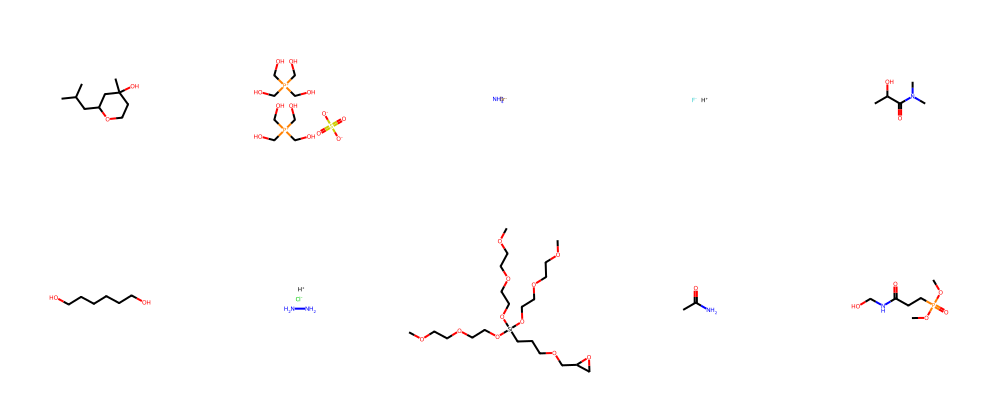

The least soluble compounds in the dataset:


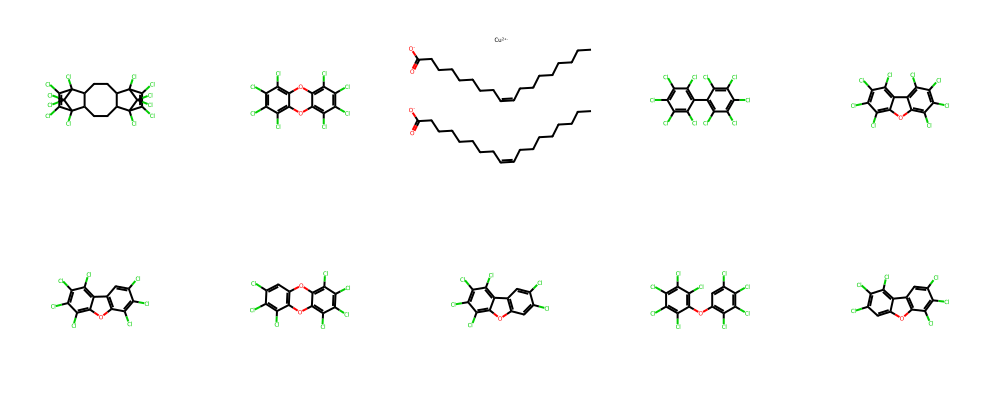

In [14]:
print('The most soluble compounds in the dataset:')
smiles_list = split['train'].sort_values('Y', ascending=False).iloc[:10].Drug
display(Chem.Draw.MolsToGridImage([Chem.MolFromSmiles(smiles) for smiles in smiles_list], molsPerRow=5))
print('The least soluble compounds in the dataset:')
smiles_list = split['train'].sort_values('Y', ascending=True).iloc[:10].Drug
display(Chem.Draw.MolsToGridImage([Chem.MolFromSmiles(smiles) for smiles in smiles_list], molsPerRow=5))

### BBBP

In [15]:
from tdc.single_pred.adme import ADME
from tdc import Evaluator

class Featurizer:
    def __init__(self, y_column, smiles_col='Drug', **kwargs):
        self.y_column = y_column
        self.smiles_col = smiles_col
        self.__dict__.update(kwargs)
    
    def __call__(self, df):
        raise NotImplementedError()
        

class ECFPFeaturizer(Featurizer):
    def __init__(self, y_column, radius=2, length=1024, **kwargs):
        self.radius = radius
        self.length = length
        super().__init__(y_column, **kwargs)
    
    def __call__(self, df):
        fingerprints = []
        labels = []
        for i, row in df.iterrows():
            y = row[self.y_column]
            smiles = row[self.smiles_col]
            mol = Chem.MolFromSmiles(smiles)
            fp = AllChem.GetMorganFingerprintAsBitVect(mol, self.radius, nBits=self.length)
            fingerprints.append(fp)
            labels.append(y)
        fingerprints = np.array(fingerprints)
        labels = np.array(labels)
        return fingerprints, labels


def train(X_train, y_train, X_valid, y_valid):
    # TODO: create and train your model 
    model = None
    return model


def predict(model, X_test):
    # TODO: use your trained model to predict solubility
    return X_test


data = ADME('bbb_martins')
split = data.get_split(method='scaffold')

# TODO: write a new featurizer and replace the one below
featurizer = ECFPFeaturizer(y_column='Y')
scores = []

roc_auc = Evaluator(name = 'ROC AUC')
accuracy = Evaluator(name = 'Accuracy')

X_train, y_train = featurizer(split['train'])
X_valid, y_valid = featurizer(split['valid'])
X_test, y_test = featurizer(split['test'])
model = train(X_train, y_train, X_valid, y_valid)
predictions = predict(model, X_test, y_test)  # y_test won't be available during evaluation!
roc_auc_score = roc_auc(y_test, predictions)
accuracy_score = accuracy(y_test, predictions)
r2_score = r_squared(y_test, predictions)
print(f'ROC AUC, accuracy = {roc_auc_score}, {accuracy_score}')

Found local copy...
Loading...
Done!
100%|██████████| 2030/2030 [00:00<00:00, 2639.49it/s]


TypeError: predict() takes 2 positional arguments but 3 were given